# K nearest Neighbor Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/ishan/Desktop/Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.drop(['Unnamed: 0'],inplace = True,axis =1)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.shape

(1000, 11)

In [8]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


In [7]:
df1  = df.drop(['SBI','LQE','FDJ','NXJ'],axis =1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
df1.head()

,WTT,PTI,EQW,QWG,PJF,HQE,TARGET CLASS
0,0.913917,1.162073,0.567946,0.352608,0.643798,0.879422,1
1,0.635632,1.003722,0.535342,0.648450,1.013546,0.621552,0
2,0.721360,1.201493,0.921990,0.720781,1.154483,0.957877,0
3,1.234204,1.386726,0.653046,0.875128,1.380003,1.522692,1
4,1.279491,0.949750,0.627280,0.703727,0.646691,1.463812,1


In [11]:
x = df1.iloc[:,0:-1]
y= df1.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25)

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:

scaled_features = scaler.transform(X_train)

In [15]:
type(scaled_features)

numpy.ndarray

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,QWG,PJF,HQE
0,1.623598,2.334701,0.092503,0.408622,0.289202,-0.649572
1,0.860712,0.401699,-1.052408,0.711618,0.808466,1.151420
2,-0.313413,1.382752,0.835434,-0.214284,1.247263,-1.284603
3,-1.021714,-0.768365,-1.112517,-1.406041,0.315031,-0.680940
4,-1.420608,0.019319,2.205961,0.459589,-0.073265,0.789053


In [17]:
scaled_features

array([[ 1.62359788,  2.33470145,  0.09250276,  0.4086219 ,  0.28920218,
        -0.64957177],
       [ 0.86071209,  0.40169886, -1.05240821,  0.71161827,  0.80846567,
         1.15141987],
       [-0.31341296,  1.38275151,  0.83543359, -0.21428383,  1.24726333,
        -1.2846033 ],
       ...,
       [ 1.3010916 , -0.66192673, -0.67108183, -1.51581943, -1.52839881,
         0.74928659],
       [ 2.64666799,  0.1594472 , -0.4167854 ,  0.89973166, -0.30247149,
        -1.27226288],
       [ 1.55807421,  0.15375317, -0.87625971, -0.96206819, -0.1629035 ,
         0.39096105]])

In [18]:

from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=29)

In [20]:
knn.fit(scaled_features,y_train)

KNeighborsClassifier(n_neighbors=29)

In [21]:
scaled_X_test = scaler.transform(X_test)

In [22]:
pred = knn.predict(scaled_X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [24]:
print(confusion_matrix(y_test,pred))

[[116   6]
 [  2 126]]


In [25]:
print(accuracy_score(y_test,pred))

0.968


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       122
           1       0.95      0.98      0.97       128

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [27]:
error_rate = []
error_rate_train = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train)
    pred_i = knn.predict(scaled_X_test)
    pred_i_train = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_test))
    error_rate_train.append(np.mean(pred_i_train != y_train))

Text(0, 0.5, 'Error Rate')

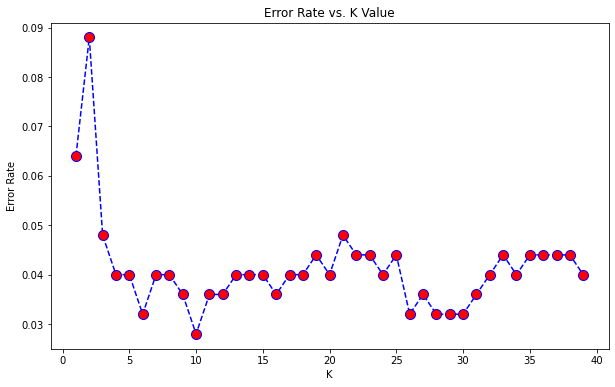

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

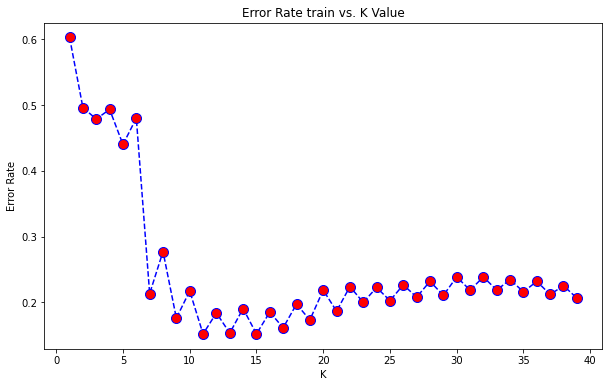

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate train vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')